In [135]:
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.static import teams 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from termcolor import colored
import os

pd.options.mode.chained_assignment = None

In [2]:
teams_info = teams.get_teams()

In [3]:
abbreviations = [x['abbreviation'] for x in teams_info]
print(abbreviations)

['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']


In [4]:
league_game_log = leaguegamelog.LeagueGameLog(season = '2022', player_or_team_abbreviation = 'T').get_data_frames()[0]
league_game_log.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,240,40,...,27,31,16,8,3,14,25,117,-9,1
1,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,46,...,30,36,24,8,3,11,24,126,9,1
2,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,240,45,...,37,48,31,11,4,18,23,123,14,1
3,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,240,40,...,39,48,23,12,4,22,18,109,-14,1
4,22022,1610612753,ORL,Orlando Magic,0022200003,2022-10-19,ORL @ DET,L,240,42,...,38,48,21,5,5,18,24,109,-4,1


In [5]:
columns = list(league_game_log.columns)[8:-1]
print(columns)

['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']


In [38]:
team_a = 'PHI'
team_b = 'DEN'

stat = 'PTS'
line = 231

n_last_games = 15

In [39]:
def get_team_games(team, games):
    games_dict = dict()
    games_dict['GAMES'] = games[games['TEAM_ABBREVIATION'] == team]
    games_dict['GAMES_OPP'] = games[(games['MATCHUP'].str.contains(team)) & (games['TEAM_ABBREVIATION'] != team)]
    games_dict['GAMES_HOME'] = games_dict['GAMES'][~games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_HOME_OPP'] = games_dict['GAMES_OPP'][games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY'] = games_dict['GAMES'][games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY_OPP'] = games_dict['GAMES_OPP'][~games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    return games_dict
    
def get_team_stat_means(team, games, stat, n_last_games):
    games = get_team_games(team, games)
    return team, games['GAMES'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_OPP'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_HOME'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_HOME_OPP'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_AWAY'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_AWAY_OPP'].iloc[-n_last_games:,:][stat].mean()
    
rows = []
for team in abbreviations:
    rows.append(get_team_stat_means(team, league_game_log, stat, n_last_games))
    
teams_stats = pd.DataFrame(rows, columns=['TEAM', 'MADE', 'CONCEDED', 'HOME_MADE', 'HOME_CONCEDED', 'AWAY_MADE', 'AWAY_CONCEDED'])
teams_stats

,TEAM,MADE,CONCEDED,HOME_MADE,HOME_CONCEDED,AWAY_MADE,AWAY_CONCEDED
0,ATL,119.466667,119.200000,117.733333,115.800000,116.800000,120.533333
1,BOS,114.600000,112.133333,120.333333,112.400000,113.066667,112.200000
2,CLE,110.933333,108.933333,112.133333,107.466667,106.600000,107.733333
3,NOP,109.733333,114.133333,115.400000,111.666667,113.266667,118.200000
4,CHI,116.066667,113.666667,117.933333,114.800000,113.466667,117.400000
5,DAL,114.600000,117.600000,116.933333,113.933333,112.000000,115.333333
6,DEN,117.200000,108.400000,120.400000,108.800000,111.666667,113.733333
7,GSW,120.666667,118.800000,118.133333,114.933333,116.800000,122.400000
8,HOU,108.333333,120.466667,104.666667,111.333333,111.200000,122.666667
9,LAC,114.533333,114.666667,109.466667,105.666667,117.266667,118.666667


In [144]:
def plot_save_chart(directory, title):
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    plt.savefig(f"{directory}/{title}.jpg", dpi=100)
    
    plt.show()
    

def plot_stats_chart(team, games, stat):
    last_games = games.iloc[-n_last_games*2:,:]
    last_games['hue'] = last_games['TEAM_ABBREVIATION'].map(lambda x: 'Made' if x == team else 'Conceded')
    
    plt.figure(figsize=(16,10))
    sns.lineplot(data=last_games, x='GAME_DATE', y=stat, hue='hue', palette=['b', 'r'])

    dates = last_games['GAME_DATE'].unique()
    
    for i in range(len(dates)):
        game = last_games[last_games['GAME_DATE'] == dates[i]].reset_index()
        host = 'A' if '@' in game.loc[0,'MATCHUP'] else 'H'
        plt.annotate(text=f"{i+1}:{host}", xy=(dates[i], game.loc[0, stat] + 1), fontsize=10)
        
    title = "{} - {} Made-Conceded Progression".format(team, stat)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(stat)
    
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
    
    directory = f"../dist/{team}"
    
    plot_save_chart(directory, title)
    
def plot_totals_with_line(team, games, line, stat):
    last_games = games.iloc[-n_last_games*2:,:]
    dates = last_games['GAME_DATE'].unique()
    totals = last_games.groupby('GAME_DATE')[stat].sum()
    
    plt.figure(figsize=(16,10))
    sns.lineplot(x=dates, y=totals, label ='Totals')
    
    for i in range(len(dates)):
        host = 'A' if '@' in last_games.iloc[i,:]['MATCHUP'] else 'H'
        plt.annotate("{}:{}".format(i+1, host), (dates[i], totals[i] + 1), fontsize=10)
    
    title = "{} - {} Totals Progression".format(team, stat)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('{} Totals'.format(stat))
    
    plt.axhline(y=line, color='r', linestyle='-')
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    directory = f"../dist/{team}"
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    plt.savefig(f"{directory}/{title}.jpg", dpi=100)
    
    plt.show()

def get_team_made_conceded_pct(games, opp_games, stat, line):
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    totals = made + conceded
    greater = (totals > line).sum()
    pct = greater*100/len(totals)
    return pct

def get_team_info(team, games, line, stat, n_last_games, is_home):
    overall_pct = get_team_made_conceded_pct(games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], stat, line)
    print("\n{} had their totals above {} in {:.2f}% of the last {} games".format(team, line, overall_pct, n_last_games))
    if is_home:
        home_pct = get_team_made_conceded_pct(games['GAMES_HOME'].iloc[-n_last_games:,:], games['GAMES_HOME_OPP'].iloc[-n_last_games:,:], stat, line)
        print("At home, {} had their totals above {} in {:.2f}% of the last {} games".format(team, line, overall_pct, n_last_games))
    else:
        awat_pct = get_team_made_conceded_pct(games['GAMES_AWAY'].iloc[-n_last_games:,:], games['GAMES_AWAY_OPP'].iloc[-n_last_games:,:], stat, line)
        print("On the road, {} had their totals above {} in {:.2f}% of the last {} games".format(team, line, awat_pct, n_last_games))
        
def display_team_info(team, games, line, stat, n_last_games, is_home):
    games_dict = get_team_games(team, games)
    last_games = games_dict['GAMES'].iloc[-n_last_games:,:].reset_index(drop=True)
    last_games_opp = games_dict['GAMES_OPP'].iloc[-n_last_games:,:]
    
    print('LAST {} GAMES:'.format(n_last_games))
    for i, row in last_games.iterrows():
        game_string = "{}: {} {} {} {} {} // Diff: {}".format(i+1, team, row['PTS'], '@' if '@' in row['MATCHUP'] else 'X', last_games_opp.iloc[i,:]['PTS'], last_games_opp.iloc[i,:]['TEAM_ABBREVIATION'], row['PTS']-last_games_opp.iloc[i,:]['PTS'])
        if row['WL'] == 'W':
            print(colored(game_string, 'green'))
        else:
            print(colored(game_string, 'red'))
    
    get_team_info(team, games_dict, line, stat, n_last_games, is_home)

    filtered_games = games[games['MATCHUP'].str.contains(team)]
    
    plot_stats_chart(team, filtered_games, stat)
    plot_totals_with_line(team, filtered_games, line, stat)


LAST 15 GAMES:
1: PHI 111 @ 116 WAS // Diff: -5
2: PHI 116 @ 127 NOP // Diff: -11
3: PHI 115 @ 96 OKC // Diff: 19
4: PHI 120 X 111 NOP // Diff: 9
5: PHI 129 X 126 IND // Diff: 3
6: PHI 112 X 126 CHI // Diff: -14
7: PHI 123 @ 111 DET // Diff: 12
8: PHI 147 X 116 DET // Diff: 31
9: PHI 114 X 133 OKC // Diff: -19
10: PHI 118 @ 117 UTA // Diff: 1
11: PHI 113 @ 112 LAL // Diff: 1
12: PHI 120 @ 110 LAC // Diff: 10
13: PHI 105 @ 95 POR // Diff: 10
14: PHI 129 @ 127 SAC // Diff: 2
15: PHI 137 X 133 BKN // Diff: 4

PHI had their totals above 231 in 60.00% of the last 15 games
At home, PHI had their totals above 231 in 60.00% of the last 15 games


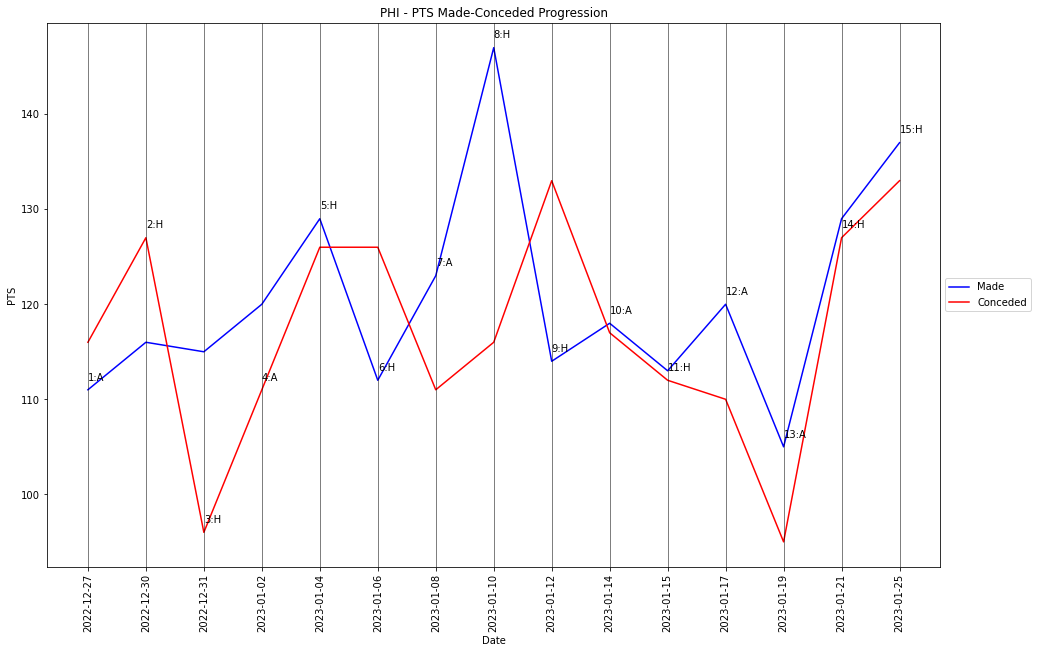

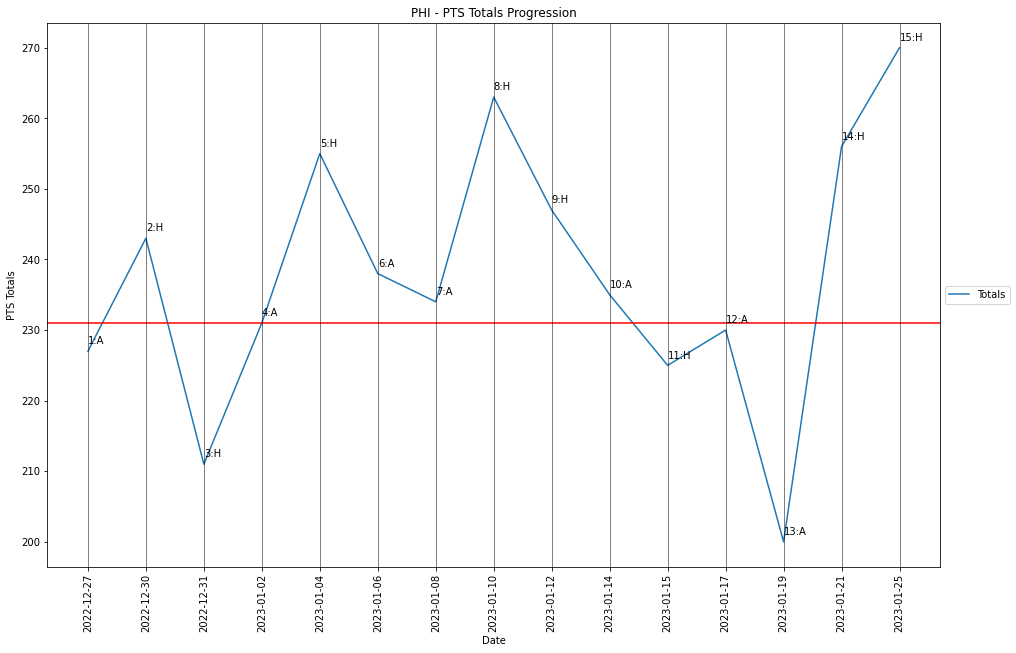

In [145]:
display_team_info(team_a, league_game_log, line, stat, n_last_games, True)

LAST 15 GAMES:
1: DEN 124 X 119 MIA // Diff: 5
2: DEN 123 X 111 BOS // Diff: 12
3: DEN 111 @ 124 MIN // Diff: -13
4: DEN 122 X 91 LAC // Diff: 31
5: DEN 121 X 108 CLE // Diff: 13
6: DEN 122 X 109 LAL // Diff: 13
7: DEN 126 X 97 PHX // Diff: 29
8: DEN 115 @ 103 LAC // Diff: 12
9: DEN 119 X 116 ORL // Diff: 3
10: DEN 122 X 113 POR // Diff: 9
11: DEN 122 X 118 MIN // Diff: 4
12: DEN 134 X 111 IND // Diff: 23
13: DEN 99 X 101 OKC // Diff: -2
14: DEN 99 @ 98 NOP // Diff: 1
15: DEN 99 @ 107 MIL // Diff: -8

DEN had their totals above 231 in 46.67% of the last 15 games
On the road, DEN had their totals above 231 in 33.33% of the last 15 games


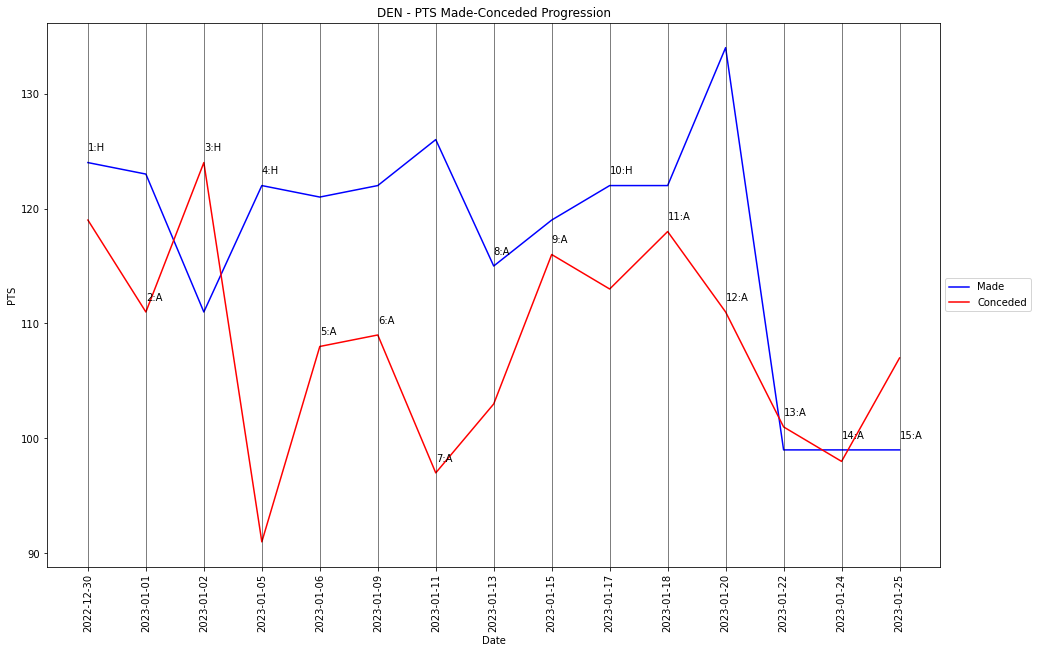

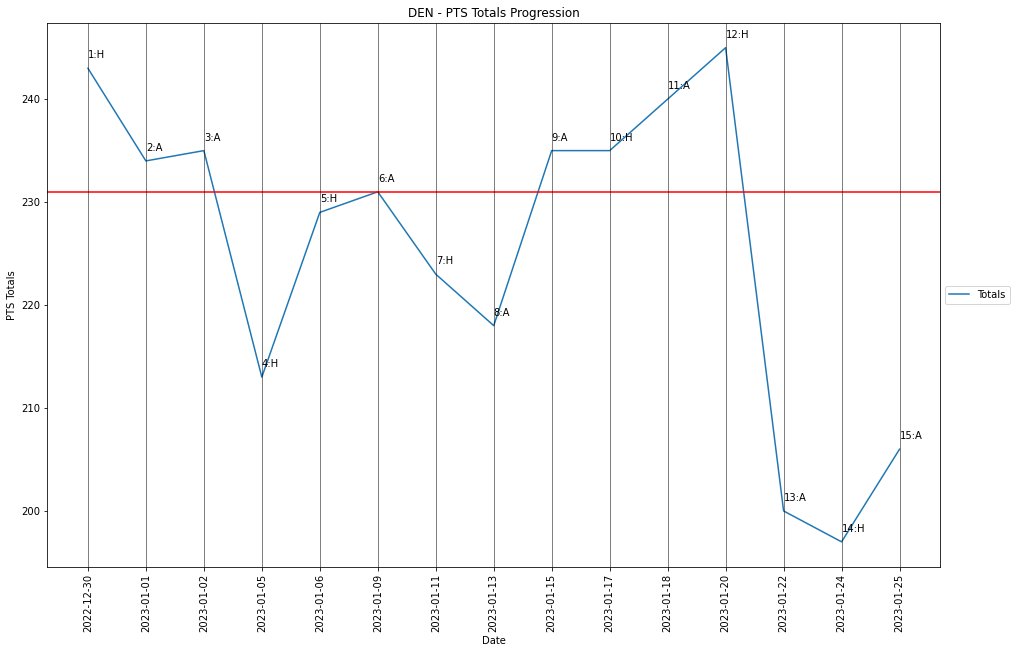

In [146]:
display_team_info(team_b, league_game_log, line, stat, n_last_games, False)